In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Задание 1

Для работы используйте датасет “happines_corruption.csv”, приложенный к материалам занятия. 
* Базово изучите датасет (достаточно методов info() и describe()).
* Выдвиньте пару гипотез, например, “Верно ли, что чем выше ВВП, тем выше и уровень счастья?” или “Есть ли взаимосвязь между уровнем доверия правительству и уровнем счастья?”. Постарайтесь подтвердить или опровергнуть их визуально и с помощью расчётов.
* Желательно, но не обязательно:
Составьте корреляционную матрицу всех числовых признаков набора данных и визуализируйте её с помощью тепловой карты.

Описание столбцов:
* Country - Name of the country.
* happiness_score - Average of responses to the primary life evaluation question from the Gallup World Poll (GWP). 0-10
* gdp_per_capita - The extent to which GDP contributes to the calculation of the Happiness Score.
* family - The extent to which Family contributes to the calculation of the Happiness Score
* health - The extent to which Life expectancy contributed to the calculation of the Happiness Score
* freedom - The extent to which Freedom contributed to the calculation of the Happiness Score
* generosity - A numerical value calculated based on poll participants’ perceptions of generosity in their country.
* government_trust - The extent to which Perception of Corruption contributes to Happiness Score.
* dystopia_residual - A score based on a hypothetical comparison to the world’s saddest country.
* continent - Region of the country.

In [94]:
data = pd.read_csv('happines_corruption.csv')
data.head()

,Country,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,continent,Year,social_support,cpi_score
0,Norway,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,Europe,2015,0.0,88
1,Denmark,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,Europe,2015,0.0,91
2,Iceland,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,Europe,2015,0.0,79
3,Switzerland,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,Europe,2015,0.0,86
4,Finland,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,Europe,2015,0.0,90


In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            792 non-null    object 
 1   happiness_score    792 non-null    float64
 2   gdp_per_capita     792 non-null    float64
 3   family             792 non-null    float64
 4   health             792 non-null    float64
 5   freedom            792 non-null    float64
 6   generosity         792 non-null    float64
 7   government_trust   792 non-null    float64
 8   dystopia_residual  792 non-null    float64
 9   continent          792 non-null    object 
 10  Year               792 non-null    int64  
 11  social_support     792 non-null    float64
 12  cpi_score          792 non-null    int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 80.6+ KB


In [7]:
# Изучаем данные, пропусков нет, анализируем выбросы, средние и медианные значения
data.describe()

,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,Year,social_support,cpi_score
count,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000
mean,5.473310,0.929217,0.504998,0.648691,0.427016,0.212440,0.125720,1.379277,2017.500000,0.609302,44.327020
std,1.124726,0.385774,0.552736,0.232261,0.148003,0.121660,0.109032,1.075276,1.708904,0.640754,19.508833
min,2.566900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2015.000000,0.000000,11.000000
25%,4.590750,0.644242,0.000000,0.510070,0.325433,0.125784,0.052862,0.000000,2016.000000,0.000000,30.000000
50%,5.485500,0.994544,0.000000,0.685397,0.439621,0.197000,0.089000,1.731948,2017.500000,0.176214,38.000000
75%,6.300500,1.228677,1.040410,0.815641,0.546280,0.273250,0.154250,2.236894,2019.000000,1.268250,57.000000
max,7.808700,2.096000,1.610574,1.141000,0.724000,0.838075,0.551910,3.602140,2020.000000,1.644000,91.000000


Text(0.5, 1.0, 'Зависимость уровня счастья и показателя ВВП')

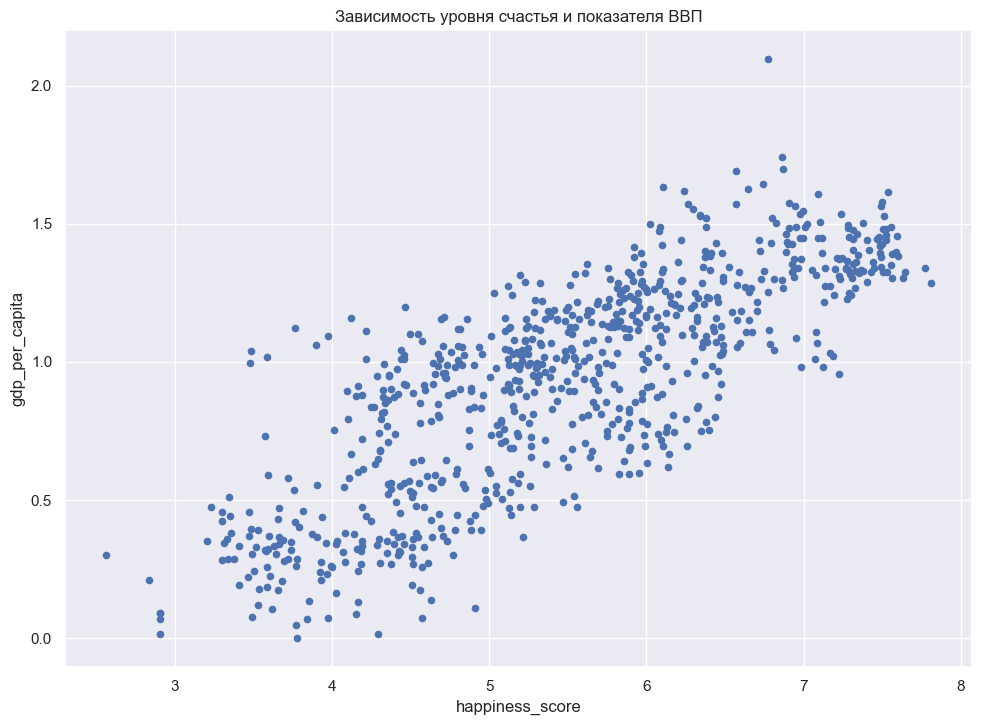

In [96]:
# Верно ли, что чем выше ВВП, тем выше и уровень счастья?
# Согласно графику предполагаем высокую корреляцию показателей
data.plot(kind='scatter', x='happiness_score', y='gdp_per_capita')
plt.title("Зависимость уровня счастья и показателя ВВП")

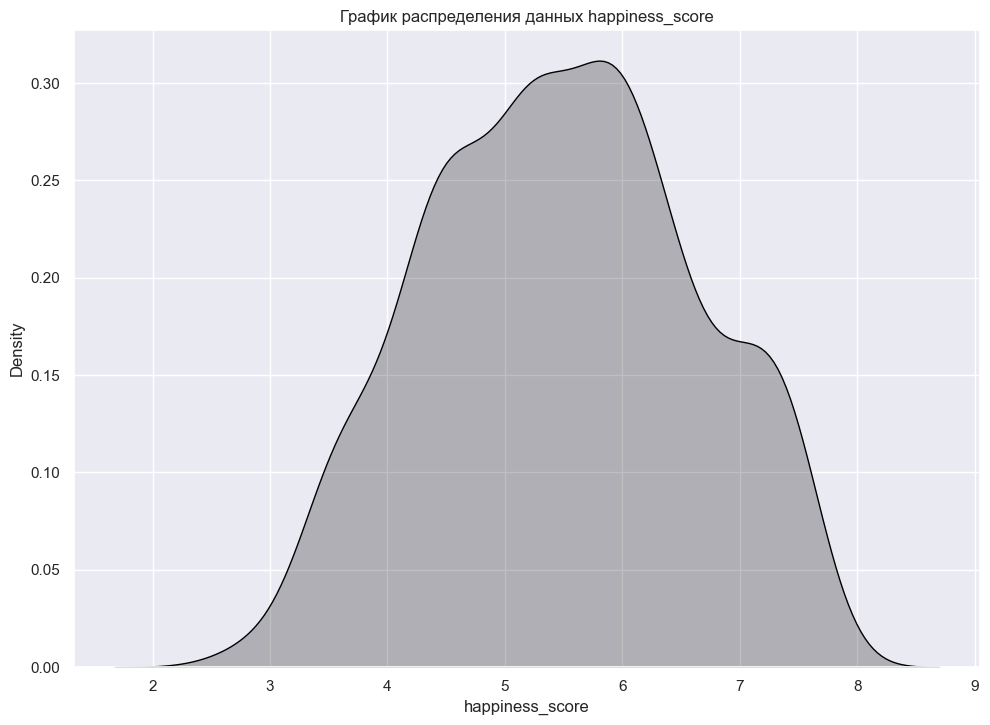

In [99]:
# Для расчета коэффициента корреляции проверим данные на нормальность
sns.kdeplot(data['happiness_score'], label="happiness_score", fill = True, color = '#000000')
plt.title('График распределения данных happiness_score')
plt.show()

In [20]:
import scipy.stats as st

stat, p = st.shapiro(data['happiness_score'])

print(f'stat = {stat:.3f}, p = {p:.5f}')
if p > 0.05:
    print('Вероятно, распределение нормальное')
else:
    print('Вероятно, распределение не нормальное')

stat = 0.985, p = 0.00000
Вероятно, распределение не нормальное


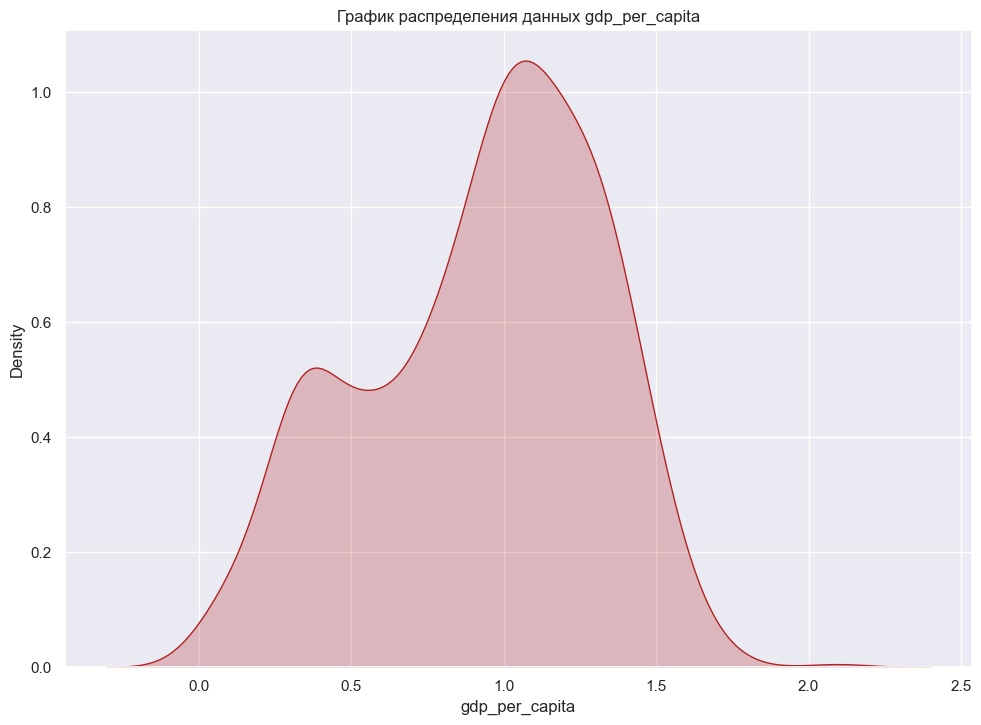

In [100]:
sns.kdeplot(data['gdp_per_capita'], label="gdp_per_capita", fill = True, color = '#B22222')
plt.title('График распределения данных gdp_per_capita')
plt.show()

In [22]:
stat, p = st.shapiro(data['gdp_per_capita'])

print(f'stat = {stat:.3f}, p = {p:.5f}')
if p > 0.05:
    print('Вероятно, распределение нормальное')
else:
    print('Вероятно, распределение не нормальное')

stat = 0.969, p = 0.00000
Вероятно, распределение не нормальное


In [28]:
# В виду не нормального распределения будем использовать коэффициент корреляции Спирмана
# Наблюдаем довольно сильную корреляцию показателей, из чего делаем вывод:
# Чем выше ВВП, тем выше и уровень счастья
data[['happiness_score', 'gdp_per_capita']].corr(method='spearman')

,happiness_score,gdp_per_capita
happiness_score,1.000000,0.796952
gdp_per_capita,0.796952,1.000000


In [29]:
# Давайте проверим зависимость семьи и здоровья на уровень счастья

Text(0.5, 1.0, 'Взаимосвязь happiness - family')

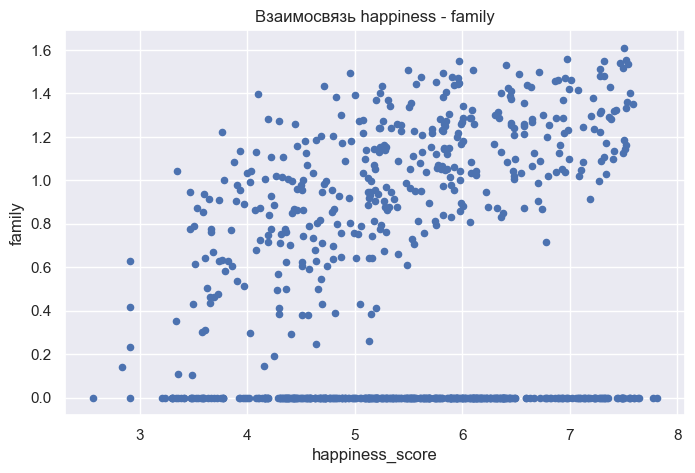

In [101]:
# Для начала проверим показатель family
data.plot(kind='scatter', figsize=[8, 5], x='happiness_score', y='family')
plt.title("Взаимосвязь happiness - family")

In [37]:
# Проверим данные, с показателем family = 0
# Действительно при нулевом показателе возможны высокие показатели счастья
data[['happiness_score','family']][data['family']==0]

,happiness_score,family
264,7.7690,0.0
265,7.6000,0.0
266,7.5540,0.0
267,7.4940,0.0
268,7.4880,0.0
...,...,...
787,3.4789,0.0
788,3.4762,0.0
789,3.3123,0.0
790,3.2992,0.0


In [38]:
# Подтвердим гипотезу независимости показателей с помощью коэффициента корреляции Спирмана
data[['happiness_score', 'family']].corr(method='spearman')

,happiness_score,family
happiness_score,1.000000,0.139737
family,0.139737,1.000000


Text(0.5, 1.0, 'Взаимосвязь happiness - health')

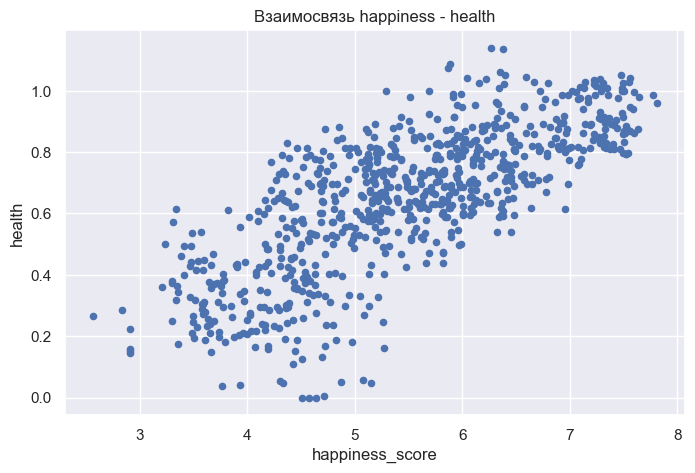

In [102]:
# А теперь health
data.plot(kind='scatter', figsize=[8, 5], x='happiness_score', y='health')
plt.title("Взаимосвязь happiness - health")

In [52]:
# Действительно, высокая корреляция
data[['happiness_score', 'health']].corr(method='spearman')

,happiness_score,health
happiness_score,1.000000,0.765699
health,0.765699,1.000000


In [46]:
# Таким образом, показатель счастья напрямую зависит от здоровья человека 
# и не сильно зависит от семейного положения

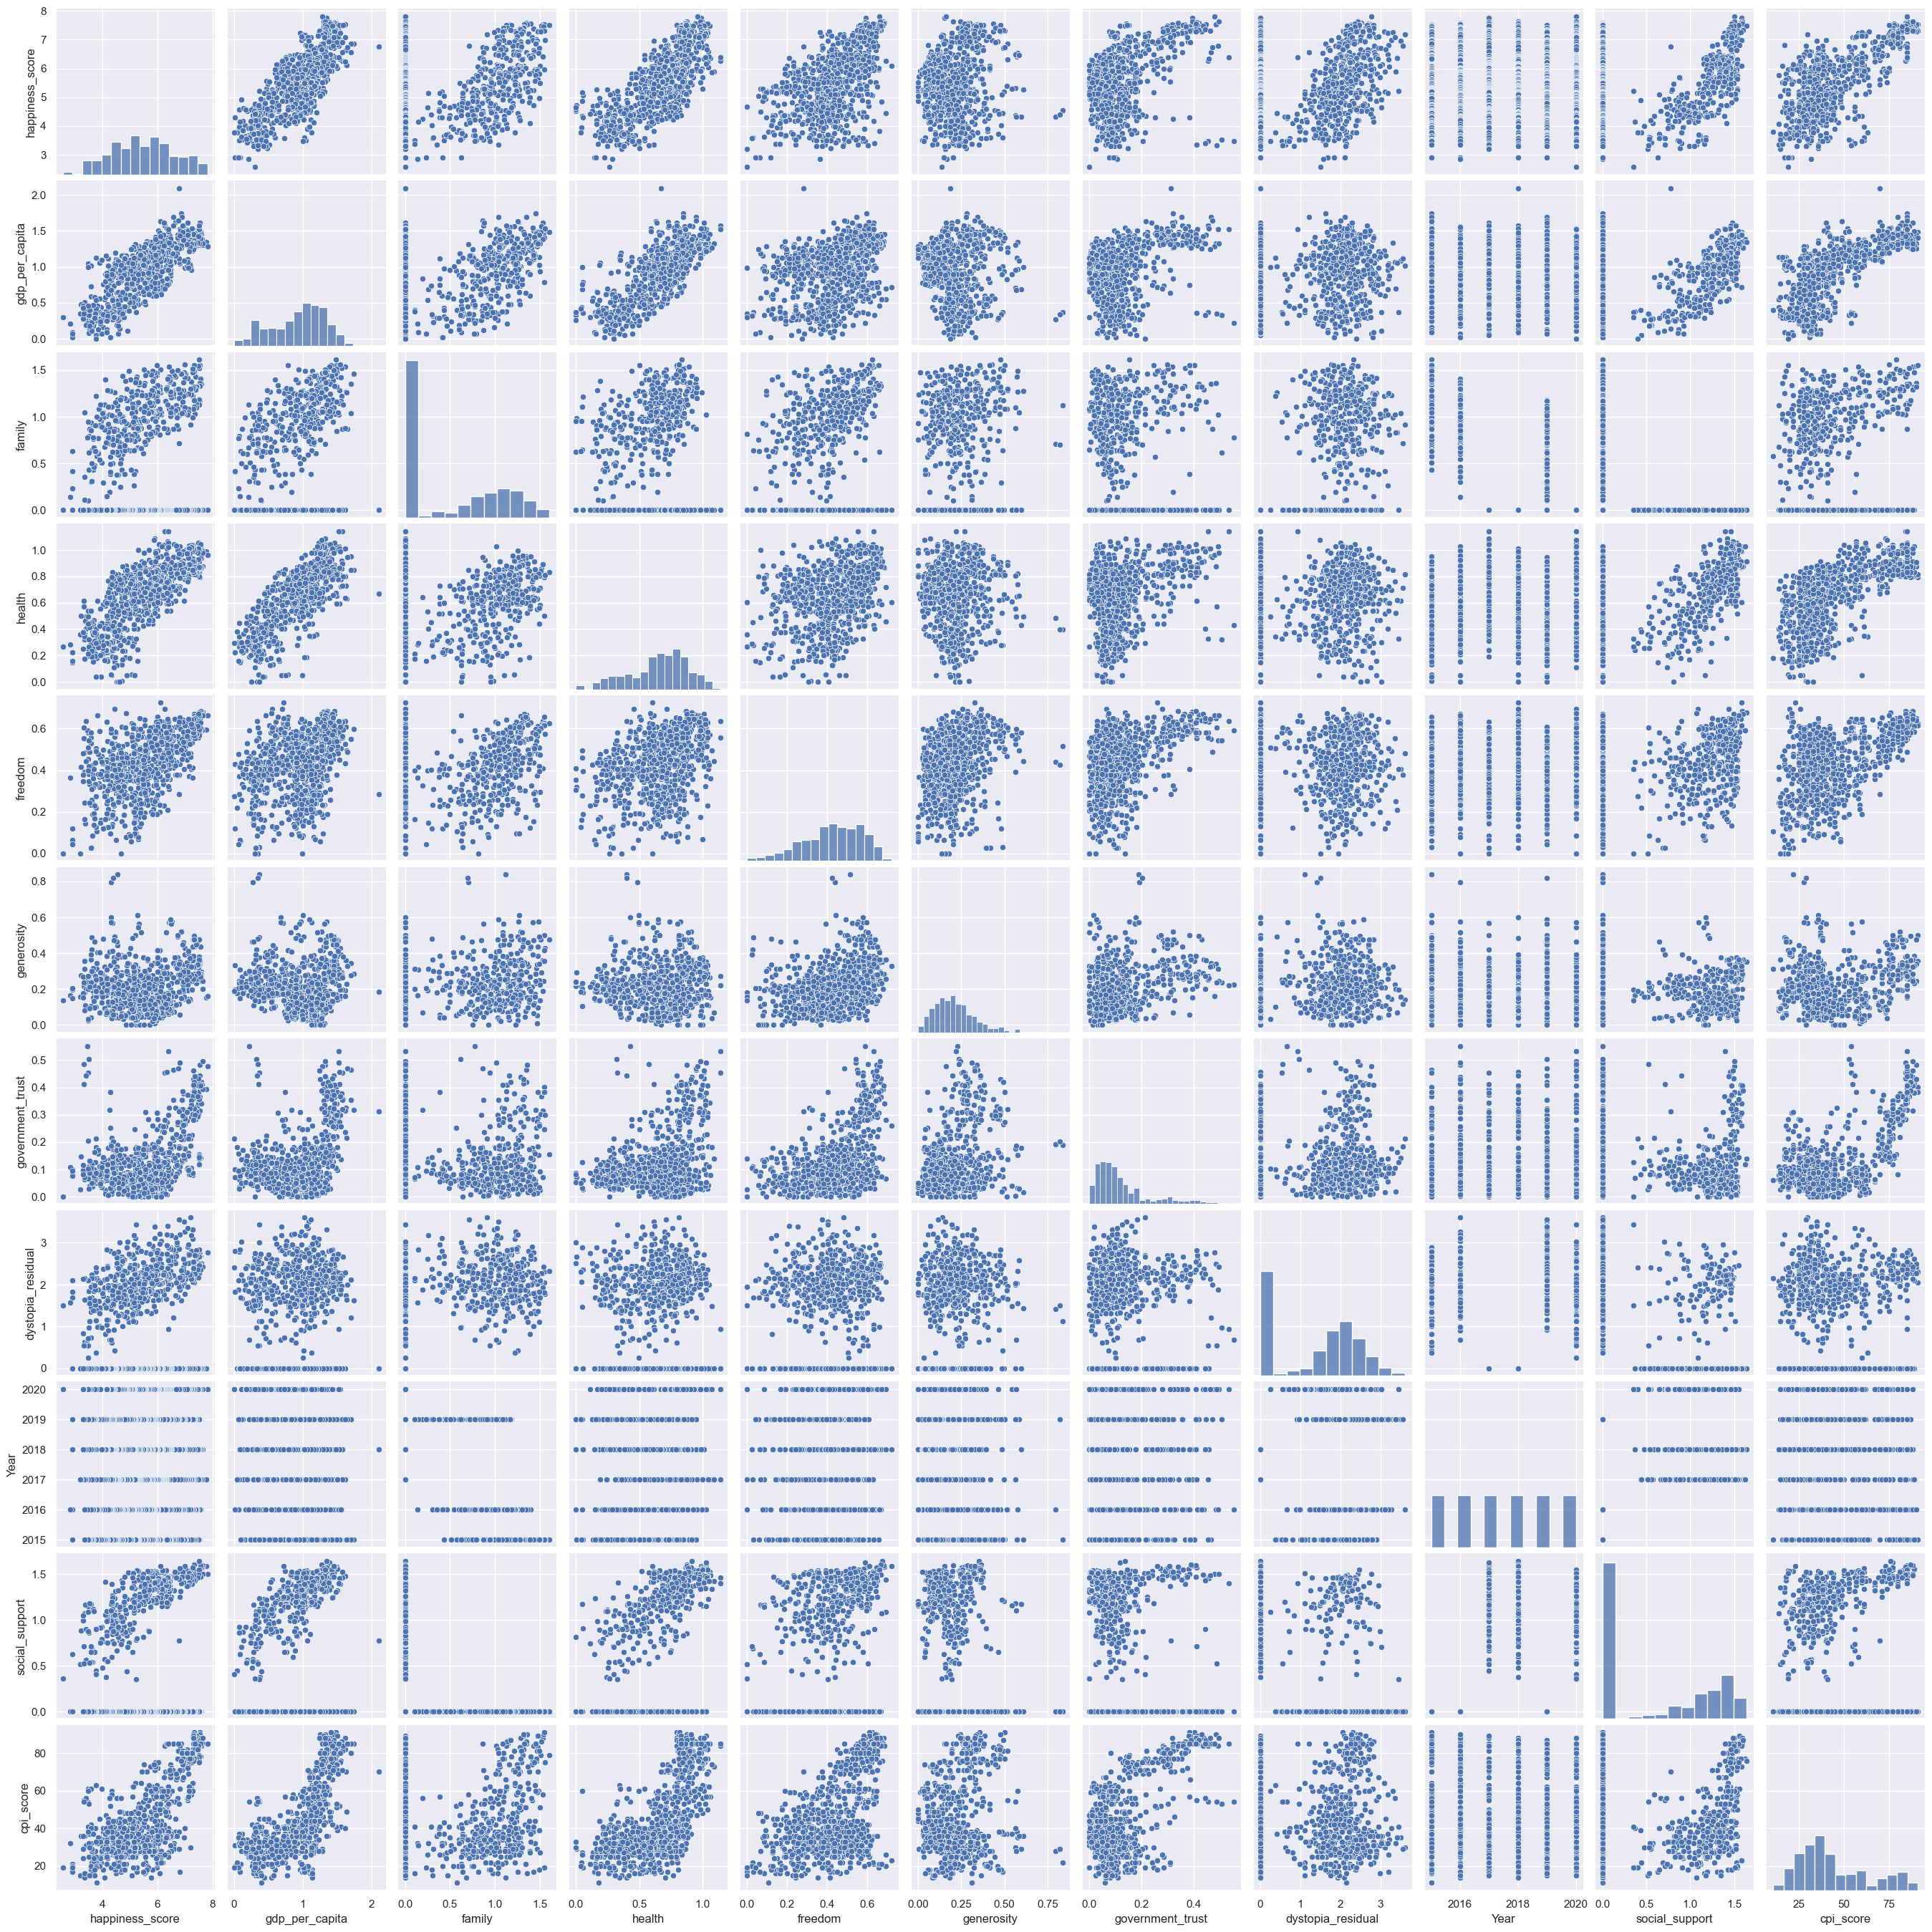

In [47]:
# Посмотрим на взаимосвязи между всеми признаками датасета
sns.pairplot(data)

In [48]:
# Но нагляднее посчитать коэффициенты корреляции между всеми показателями
data.corr(method='spearman')

/var/folders/y4/m_h08_mx5632hfk34wzwpt4c0000gn/T/ipykernel_4360/351880289.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr(method='spearman')


,happiness_score,gdp_per_capita,family,health,freedom,generosity,government_trust,dystopia_residual,Year,social_support,cpi_score
happiness_score,1.000000,0.796952,0.139737,0.765699,0.549513,0.138579,0.351135,0.233622,0.025435,0.239110,0.622027
gdp_per_capita,0.796952,1.000000,0.215922,0.770263,0.360422,-0.002301,0.287957,0.064533,-0.042062,0.142498,0.735174
family,0.139737,0.215922,1.000000,-0.074117,0.006478,0.227875,0.102359,0.557576,-0.591407,-0.855444,0.113448
health,0.765699,0.770263,-0.074117,1.000000,0.415357,-0.019394,0.210789,-0.045528,0.070242,0.387623,0.685520
freedom,0.549513,0.360422,0.006478,0.415357,1.000000,0.339178,0.441906,0.003327,0.059778,0.236287,0.422193
generosity,0.138579,-0.002301,0.227875,-0.019394,0.339178,1.000000,0.234489,0.160056,-0.104285,-0.182996,0.065831
government_trust,0.351135,0.287957,0.102359,0.210789,0.441906,0.234489,1.000000,0.137310,0.022828,-0.010907,0.333023
dystopia_residual,0.233622,0.064533,0.557576,-0.045528,0.003327,0.160056,0.137310,1.000000,0.089763,-0.594248,0.042921
Year,0.025435,-0.042062,-0.591407,0.070242,0.059778,-0.104285,0.022828,0.089763,1.000000,0.426961,0.005542
social_support,0.239110,0.142498,-0.855444,0.387623,0.236287,-0.182996,-0.010907,-0.594248,0.426961,1.000000,0.147637


/var/folders/y4/m_h08_mx5632hfk34wzwpt4c0000gn/T/ipykernel_4360/223285046.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(method='spearman'), annot=True)


<Axes: >

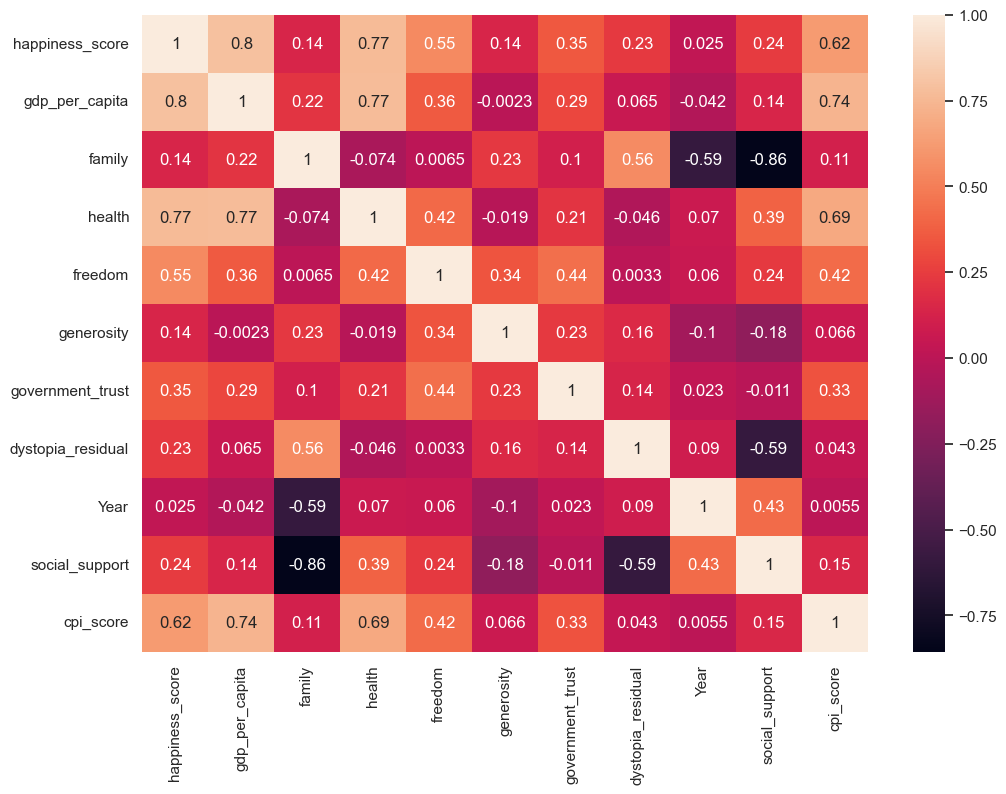

In [49]:
# Также удобно анализировать данные при помощи тепловой карты
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data.corr(method='spearman'), annot=True)

### Тут наглядно мы можем выделить самые сильные корреляции:
* Уровень счастья - ВВП
* Уровень счастья - Здоровье
* ВВП - Здоровье

И значимое влияние вышеупомянутых признаков на Общий показатель CPI

### Также сильная обратная зависимость:
Чем выше семейный показатель - тем ниже социальная поддержка

# Задание 2

Продолжаем изучать цены на газ в Южной Корее. Файл с данными gas_sales_data.csv вы сможете найти в материалах занятия (для этого набора данных вы ранее рассчитывали коэффициенты корреляции в тренажере).

В этом задании нужно окончательно ответить на вопрос:
Есть ли связь между среднемесячной температурой и потреблением газа в Южной Корее

Для этого:

* Оставьте только два столбца:Temperature и Sum.
* Постройте диаграмму рассеяния.
* Постройте модель линейной регрессии для выбранных признаков.
* Рассчитайте точность модели на тестовой выборке.
* Выведите график остатков.

In [103]:
data = pd.read_csv('gas_sales_data.csv')
data.head()

,Year,Month,Temperature,Gangwondo,Seoul,Gyeonggido,Incheon,Gyeongsangnamdo,Gyeongsangbukdo,Gwangju,...,Daejeon,Busan,Sejong,Ulsan,Jeollanamdo,Jeollabukdo,Jeju,Chungcheongnamdo,Chungcheongbukdo,Sum
0,2000,1,-1.20,16219,662424,363014,139454,42129,55362,39465,...,52992,85787,0,69241,22508,34507,0,20158,27838,1717175
1,2000,2,-0.99,16280,689177,375937,145834,42604,52863,40674,...,53950,87282,0,70910,22310,33784,0,23492,27175,1766341
2,2000,3,6.64,14105,566528,323145,121324,35990,47282,34610,...,41898,74476,0,63627,18033,29315,0,21156,22904,1490537
3,2000,4,12.11,10364,396231,237437,91421,28698,40393,25898,...,28618,58316,0,47106,15920,19783,0,17447,16818,1096964
4,2000,5,17.59,6843,262940,169495,67239,21073,35083,18426,...,17503,45915,0,43749,13808,14375,0,14508,12299,790248


In [104]:
data_gas = data[['Temperature', 'Sum']]

Text(0.5, 1.0, 'Взаимосвязь Temperature - Sum')

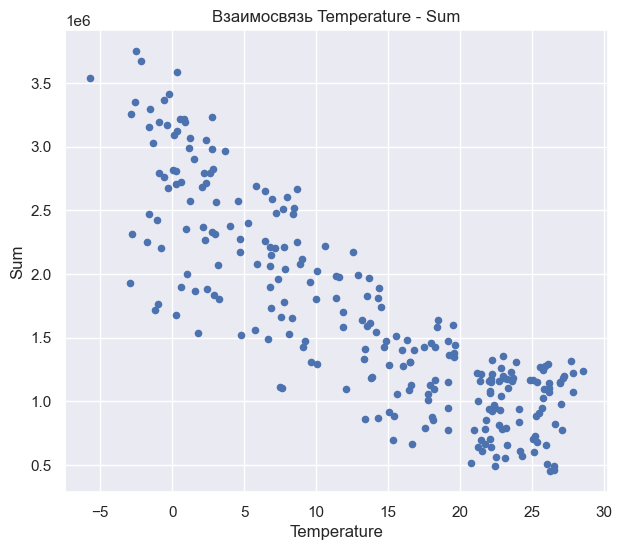

In [105]:
data_gas.plot(kind='scatter', figsize=(7,6), x='Temperature', y='Sum')
plt.title("Взаимосвязь Temperature - Sum")

In [66]:
stat, p = st.shapiro(data['Temperature'])

print(f'stat = {stat:.3f}, p = {p:.5f}')
if p > 0.05:
    print('Вероятно, распределение нормальное')
else:
    print('Вероятно, распределение не нормальное')

stat = 0.930, p = 0.00000
Вероятно, распределение не нормальное


In [65]:
stat, p = st.shapiro(data['Sum'])

print(f'stat = {stat:.3f}, p = {p:.5f}')
if p > 0.05:
    print('Вероятно, распределение нормальное')
else:
    print('Вероятно, распределение не нормальное')

stat = 0.940, p = 0.00000
Вероятно, распределение не нормальное


In [68]:
# Наблюдаем сильную обратную зависимость показателей
data_gas[['Temperature', 'Sum']].corr(method='spearman')

,Temperature,Sum
Temperature,1.000000,-0.840029
Sum,-0.840029,1.000000


In [70]:
# Построим модель линейной регрессии для выбранных признаков

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [72]:
X = data_gas[['Temperature']]
y = data_gas['Sum']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [74]:
X_train.shape

(176, 1)

In [75]:
y_train.shape

(176,)

In [76]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [77]:
model.coef_

array([-69183.68395953])

In [78]:
model.intercept_

2571665.5705572804

In [79]:
# y = -69183 * x + 2571665

In [80]:
y_pred = model.predict(X_test)
y_pred

array([1441204.17465859,  736914.27195059, 1659132.7791311 ,
       1246106.18589272,  805406.11907052, 1632842.97922648,
        641440.78808644,  691944.87737689, 1508312.34809933,
        832387.75581474, 2683051.30173212, 1971151.19378857,
       1969075.68326979, 1834167.49954871, 1041322.48137251,
       1211514.34391295, 1213589.85443174, 1615547.0582366 ,
       1100820.44957771, 2499714.53923937, 2099141.0091137 ,
        736222.43511099, 1431518.45890425, 1358875.59074675,
       1643912.36866   , 1983604.25690129,  816475.50850404,
       1625232.77399093, 2042410.38826689,  765279.58237399,
       1041322.48137251, 2609024.75989543,  956918.38694189,
       1934483.84129002, 1425291.92734789, 2344743.08717003,
       2294930.83471917,  769430.60341156, 2487953.31296625,
       2073543.04604868,  817167.34534364, 2968779.91648497,
       2721102.32790986, 2551602.30220902, 1580263.37941724,
       1906810.36770621, 1243338.83853433,  824777.55057919,
       1785738.92077704,

In [82]:
y_test

165    1480101
6       464203
111    1634442
172    1474082
115     907624
        ...   
119    2703917
75     1583588
113     949311
118    1776507
120    3256385
Name: Sum, Length: 76, dtype: int64

Text(0.5, 1.0, 'График распределения остатков')

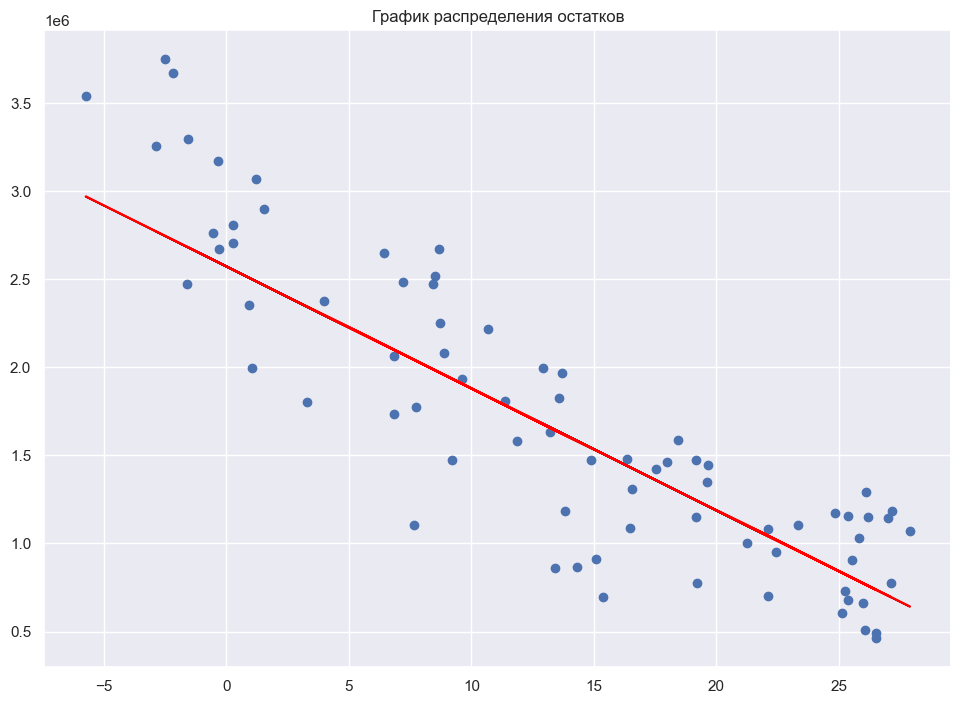

In [106]:
# Построим график остатков
# По графику мы видим, что часть реальных значений находится не сильно выше линии регрессии
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='red')
plt.title("График распределения остатков")

In [91]:
# Проверим коэффициент детерминации
model.score(X_test, y_test)

0.769403571876491

### Вывод: Согласно оценочному коэффициенту, можем подтвердить довольно неплохой прогноз значений модели 0.77.